In [1]:
! git clone https://github.com/avikskr/hand_writing_VAE.git

fatal: destination path 'hand_writing_VAE' already exists and is not an empty directory.


In [4]:
import os
import cv2

#input = 'F://AR//python//handwriting//train'
input = 'hand_writing_VAE/train'

imagepaths = os.listdir(input)
count = {}

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pmimg

img_data_list=[]
for (i, imgpath) in enumerate(imagepaths):
    #print("processing image {}/{}".format(i + 1, len(imagepaths)))
    imgpathfull=input+"//"+imgpath
    #print("imgpath:", imgpathfull)

    #image=cv2.imread(imgpathfull)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.imread(imgpathfull,0)
    gray=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
    #print(gray.shape)
    img_data_list.append(gray)

x_train=np.array(img_data_list)
print(x_train.shape)

#input = 'F://AR//python//handwriting//test'
input = 'hand_writing_VAE/test'

imagepaths = os.listdir(input)


img_data_list=[]
for (i, imgpath) in enumerate(imagepaths):
    print("processing image {}/{}".format(i + 1, len(imagepaths)))
    imgpathfull=input+"//"+imgpath
    print("imgpath:", imgpathfull)

    #image=cv2.imread(imgpathfull)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.imread(imgpathfull,0)
    gray=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
    print(gray.shape)
    img_data_list.append(gray)

x_test=np.array(img_data_list)
print(x_test.shape)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(1051, 28, 28)
processing image 1/27
imgpath: hand_writing_VAE/test//h (2).png
(28, 28)
processing image 2/27
imgpath: hand_writing_VAE/test//h (3).png
(28, 28)
processing image 3/27
imgpath: hand_writing_VAE/test//e.png
(28, 28)
processing image 4/27
imgpath: hand_writing_VAE/test//n.png
(28, 28)
processing image 5/27
imgpath: hand_writing_VAE/test//k.png
(28, 28)
processing image 6/27
imgpath: hand_writing_VAE/test//t.png
(28, 28)
processing image 7/27
imgpath: hand_writing_VAE/test//f (2).png
(28, 28)
processing image 8/27
imgpath: hand_writing_VAE/test//t (3).png
(28, 28)
processing image 9/27
imgpath: hand_writing_VAE/test//t (4).png
(28, 28)
processing image 10/27
imgpath: hand_writing_VAE/test//m.png
(28, 28)
processing image 11/27
imgpath: hand_writing_VAE/test//w (2).png
(28, 28)
processing image 12/27
imgpath: hand_writing_VAE/test//t (2).png
(28, 28)
processing image 13/27
imgpath: hand_writing_VAE/test//t (5).png
(28, 28)
processing image 14/27
imgpath: hand_writing_VAE/tes

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1051 samples, validate on 27 samples
Epoch 1/50
1051/1051 [==============================] - 1s 857us/step - loss: 0.5727 - val_loss: 0.5194
Epoch 2/50
1051/1051 [==============================] - 0s 241us/step - loss: 0.5257 - val_loss: 0.5139
Epoch 3/50
1051/1051 [==============================] - 0s 239us/step - loss: 0.5213 - val_loss: 0.5111
Epoch 4/50
1051/1051 [==============================] - 0s 238us/step - loss: 0.5125 - val_loss: 0.5012
Epoch 5/50
1051/1051 [==============================] - 0s 240us/step - loss: 0.4963 - val_loss: 0.4889
Epoch 6/50
1051/1051 [==============================] - 0s 231us/step - loss: 0.4770 - val_loss: 0.4764
Epoch 7/50
1051/1051 [==============================] - 0s 230us/step - loss: 0.4598 - val_loss: 0.4622
Epoch 8/50
1051/1051 [==============================] - 0s 222us/step - loss: 0.4455 - val_loss: 0.4498
Ep

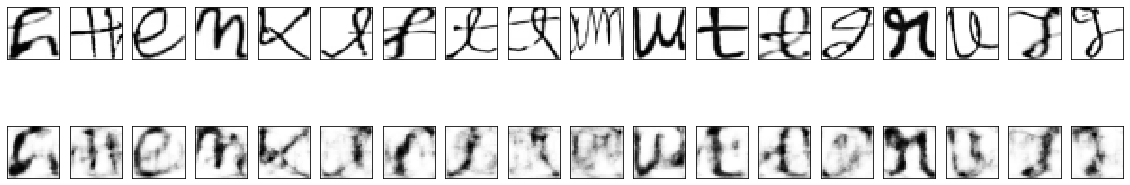

In [5]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
print(encoded_imgs.shape,' ',decoded_imgs.shape)
import matplotlib.pyplot as plt

n = 18  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

